In [21]:
import pandas as pd
from glob import glob
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

## Config Session
### This session contains static information essential to the code

In [22]:
PATH_FILE_HOMO = 'data/metrics_accuracy_homo'
PATH_FILE_TEST = 'data/metrics_accuracy_test'
# PATH_FILE_HOMO = 'data/metrics_accuracy_test'



YEARS = list(range(1985, 2022, 1))

TARGET_CLASS = 'Forest'
TARGET_YEAR = 2021

CLASSES = {
    3: 'Forest',
    4: 'Shrubland',
    6: 'Flooded Forest',
    11: 'Wetland',
    12: 'Natural Grassland',
    15: 'Pastureland',
    18: 'Cropland',
    22: 'Bareland and Impervious',
    29: 'Rock Outcrop',
    33: 'Water'
}


## Input Data
### This session we load the input data, files to perform calculations

In [23]:
df_cm = pd.read_csv(PATH_FILE_HOMO + f'/confusion_matrix_{TARGET_YEAR}.csv', index_col=0)
df_cm_perc = pd.read_csv(PATH_FILE_HOMO + f'/confusion_matrix_percentage_{TARGET_YEAR}.csv', index_col=0)

df_cm_ = pd.read_csv(PATH_FILE_TEST + f'/confusion_matrix_{TARGET_YEAR}.csv', index_col=0)
df_cm_perc_ = pd.read_csv(PATH_FILE_TEST + f'/confusion_matrix_percentage_{TARGET_YEAR}.csv', index_col=0)

df_metrics = []
df_metrics_ = []

for year in YEARS:
    df = pd.read_csv(f'{PATH_FILE_HOMO}/metrics_{year}.csv')
    df['year'] = year
    df_metrics.append(df)

    df_ = pd.read_csv(f'{PATH_FILE_TEST}/metrics_{year}.csv')
    df_['year'] = year
    df_metrics_.append(df_)

df_metrics = pd.concat(df_metrics)
df_metrics = df_metrics.rename(columns={'Unnamed: 0': 'classe'})

df_metrics_ = pd.concat(df_metrics_)
df_metrics_ = df_metrics_.rename(columns={'Unnamed: 0': 'classe'})

df_overall_acc_v1 = pd.read_csv(f'{PATH_FILE_HOMO}/overall_acc.csv')
df_overall_acc_v2 = pd.read_csv(f'{PATH_FILE_TEST}/overall_acc.csv')



## Combine Dataframes of Overall Accuracy

In [14]:
df_overall_acc_v1['version']= 'v1'
df_overall_acc_v2['version']= 'v2'

df_overall_acc = pd.concat([df_overall_acc_v1, df_overall_acc_v2]).reset_index()

df_overall_acc = df_overall_acc[['year', 'acc', 'version']]


## Overall Accuracy 

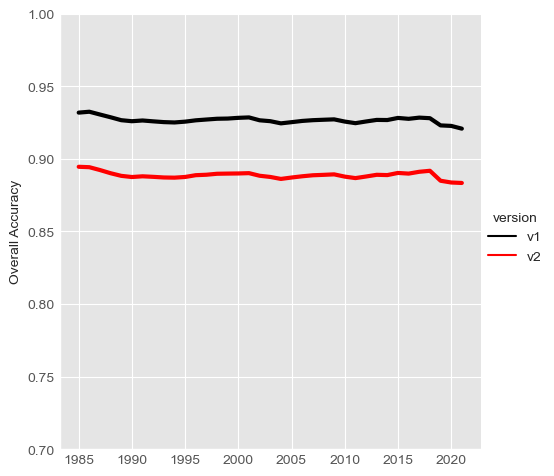

In [15]:

# fig, ax = plt.subplots()
plt.style.use('ggplot')
# plt.style.use('seaborn-white')

g = sns.relplot(
    data=df_overall_acc, x="year", y="acc",linewidth=3,
    hue="version", kind="line", palette=['black', 'red']
)

g.set_axis_labels("", "Overall Accuracy")
g.ax.set_ylim(0.7, 1)


plt.show()

'''
    1. considerar flooded forest como floresta
    2. adicionar novos valores das classes como linhas (tracejado)

'''

## Confusion Matrix

In [16]:
df_cm

,Forest,Shrubland,Wetland,Natural Grassland,Pastureland,Cropland,Bareland and Impervious,Rock Outcrop,Water,Total
Forest,16003,21,31,63,221,3,0,5,3,16494
Shrubland,61,35,50,103,16,0,0,12,0,101
Wetland,30,9,159,38,3,0,0,0,14,454
Natural Grassland,27,7,173,420,8,0,0,5,0,771
Pastureland,296,24,20,94,3015,45,0,3,0,3466
Cropland,29,1,3,17,166,337,0,0,0,387
Bareland and Impervious,14,2,5,20,34,2,0,0,3,0
Rock Outcrop,15,1,0,11,0,0,0,6,1,31
Water,19,1,13,5,3,0,0,0,351,372
Total,32844,378,707,1411,6963,940,80,65,764,22076


In [17]:
df_cm_perc

,Forest,Shrubland,Wetland,Natural Grassland,Pastureland,Cropland,Bareland and Impervious,Rock Outcrop,Water
Forest,97.88,0.13,0.19,0.39,1.35,0.02,0.0,0.03,0.02
Shrubland,22.02,12.64,18.05,37.18,5.78,0.00,0.0,4.33,0.00
Wetland,11.86,3.56,62.85,15.02,1.19,0.00,0.0,0.00,5.53
Natural Grassland,4.22,1.09,27.03,65.62,1.25,0.00,0.0,0.78,0.00
Pastureland,8.46,0.69,0.57,2.69,86.22,1.29,0.0,0.09,0.00
Cropland,5.24,0.18,0.54,3.07,30.02,60.94,0.0,0.00,0.00
Bareland and Impervious,17.50,2.50,6.25,25.00,42.50,2.50,0.0,0.00,3.75
Rock Outcrop,44.12,2.94,0.00,32.35,0.00,0.00,0.0,17.65,2.94
Water,4.85,0.26,3.32,1.28,0.77,0.00,0.0,0.00,89.54


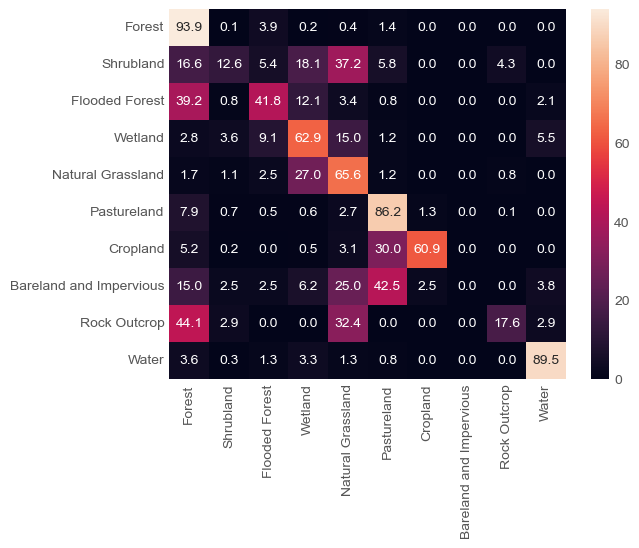

In [18]:
df_heat = df_cm_perc_.loc[~df_cm_perc_.index.isin(CLASSES.keys())]

sns.heatmap(df_heat[CLASSES.values()], annot=True, fmt=".1f")

plt.show()

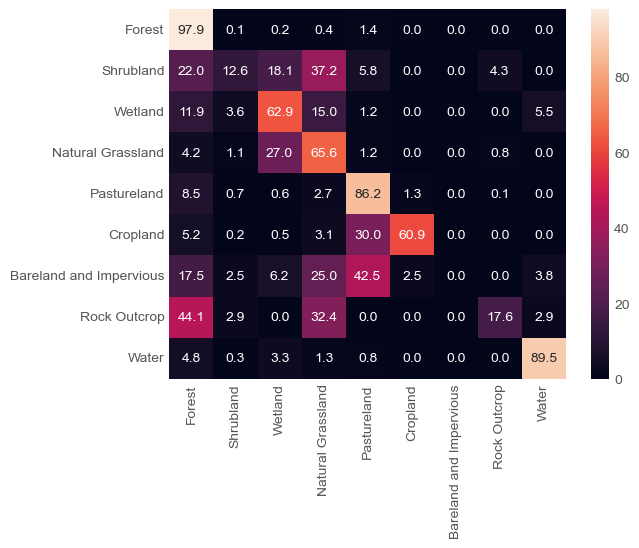

In [19]:
CLASSES_ = {k: v for k, v in CLASSES.items() if v != 'Flooded Forest'}

df_heat_ = df_cm_perc.loc[~df_cm_perc.index.isin(CLASSES_.keys())]

sns.heatmap(df_heat_[CLASSES_.values()], annot=True, fmt=".1f")

plt.show()



## Metrics
### producer, user, precision, recall, f1-score

In [25]:
df_metrics.query(f'year == {TARGET_YEAR}')

,classe,Accuracy User,Accuracy Producer,Precision,Recall,F1-Score,Comission Error,Omission Error,year
0,Forest,0.98,0.97,0.98,0.97,0.97,0.02,0.03,2021
1,Shrubland,0.13,0.35,0.13,0.35,0.19,0.87,0.65,2021
2,Wetland,0.63,0.35,0.63,0.35,0.45,0.37,0.65,2021
3,Natural Grassland,0.66,0.54,0.66,0.54,0.60,0.34,0.46,2021
4,Pastureland,0.86,0.87,0.86,0.87,0.87,0.14,0.13,2021
5,Cropland,0.61,0.87,0.61,0.87,0.72,0.39,0.13,2021
6,Bareland and Impervious,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2021
7,Rock Outcrop,0.18,0.19,0.18,0.19,0.18,0.82,0.81,2021
8,Water,0.90,0.94,0.90,0.94,0.92,0.10,0.06,2021


In [26]:
df_metrics_.query(f'year == {TARGET_YEAR}')

,classe,Accuracy User,Accuracy Producer,Precision,Recall,F1-Score,Comission Error,Omission Error,year
0,Forest,0.94,0.96,0.94,0.96,0.95,0.06,0.04,2021
1,Shrubland,0.13,0.34,0.13,0.34,0.18,0.87,0.66,2021
2,Flooded Forest,0.42,0.18,0.42,0.18,0.25,0.58,0.82,2021
3,Wetland,0.63,0.32,0.63,0.32,0.42,0.37,0.68,2021
4,Natural Grassland,0.66,0.54,0.66,0.54,0.59,0.34,0.46,2021
5,Pastureland,0.86,0.87,0.86,0.87,0.87,0.14,0.13,2021
6,Cropland,0.61,0.87,0.61,0.87,0.72,0.39,0.13,2021
7,Bareland and Impervious,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2021
8,Rock Outcrop,0.18,0.19,0.18,0.19,0.18,0.82,0.81,2021
9,Water,0.90,0.92,0.90,0.92,0.91,0.10,0.08,2021
